In [1]:
import os
import random
import numpy as np
import errno
import csv
from PIL import Image
import json

In [9]:
with open("config/backgrounds.json") as bg_conf_file:
    bg_conf = json.load(bg_conf_file)
with open("config/foregrounds.json") as fr_conf_file:
    fr_conf = json.load(fr_conf_file)
categories = ["bottles"]
fr_obj_sizes = ["s","m","l"]
obj_size_map = {
    "s":0.6,
    "m":0.75,
    "l":0.9
}
x_offset = 2
bg_labels = list(bg_conf.keys())
max_objs_in_pack = 5
rot_pc = 0.1

In [10]:
def select_fr_obj(categories, fr_conf):
    curr_fr_category = np.random.choice(categories,1)[0]
    curr_fr_category_labels = list(fr_conf[curr_fr_category].keys())
    
    curr_fr_label = np.random.choice(curr_fr_category_labels,1)[0]
    curr_fr_label_conf = fr_conf[curr_fr_category][curr_fr_label]
    
    foreground_file = "img_templates/foregrounds/{cat}/{label}.png".format(cat=curr_fr_category,label = curr_fr_label)
    return foreground_file, curr_fr_label_conf

def open_and_resize_obj(foreground_file, curr_obj_conf, fr_obj_sizes, shelf_ht):
    
    foreground = Image.open(foreground_file)
    curr_fr_obj_size = np.random.choice(fr_obj_sizes,1)[0]
    new_obj_ht = int(shelf_ht * obj_size_map[curr_fr_obj_size])
    new_obj_width = int((new_obj_ht/curr_obj_conf["height"])*curr_obj_conf["width"])
    
    img_size = (new_obj_width, new_obj_ht)
    foreground = foreground.resize(img_size, Image.LANCZOS)
    
    return foreground


In [11]:
curr_bg_label = np.random.choice(bg_labels,1)[0]
curr_bg_conf = bg_conf[curr_bg_label]
num_shelves  = curr_bg_conf["num_shelves"]
shelf_region = curr_bg_conf["shelf_region"]
x_start,x_end = shelf_region[0][0], shelf_region[1][0]
shelf_positions = curr_bg_conf["shelf_y_positions"]
shelf_ht = curr_bg_conf["shelf_ht"]
background_file = "img_templates/backgrounds/{}.jpg".format(curr_bg_label)
composite_background = Image.open(background_file)
dummy_foreground = Image.new('RGBA', composite_background.size, color = (0, 0, 0, 0))
dummy_alpha_mask = Image.new('L', composite_background.size, color=0)

for shelf in range(num_shelves):
    paste_pos = (x_start, 0)   
    while paste_pos[0] < x_end:
        num_instances = np.random.choice(max_objs_in_pack,1)[0]
        foreground_file, curr_obj_conf = select_fr_obj(categories, fr_conf)
        foreground = open_and_resize_obj(foreground_file, curr_obj_conf, fr_obj_sizes, shelf_ht)
        
        for _ in range(num_instances):
            
            is_rotated = np.random.binomial(1, p=rot_pc)
            if is_rotated:
                to_paste = foreground.rotate(np.random.randint(-90, 90), expand=1)
            else:
                to_paste = foreground

            img_size = to_paste.size
            alpha_mask = to_paste.getchannel(3)

            paste_pos = (paste_pos[0], shelf_positions[shelf]-img_size[1])
            
            new_foreground = dummy_foreground.copy()
            new_foreground.paste(to_paste, paste_pos)
            new_alpha_mask = dummy_alpha_mask.copy()
            new_alpha_mask.paste(alpha_mask, paste_pos)
            composite_background = Image.composite(new_foreground, composite_background, new_alpha_mask)
                
            paste_pos = (paste_pos[0]+img_size[0]+x_offset, shelf_positions[shelf])
            if paste_pos[0] >= x_end:
                break

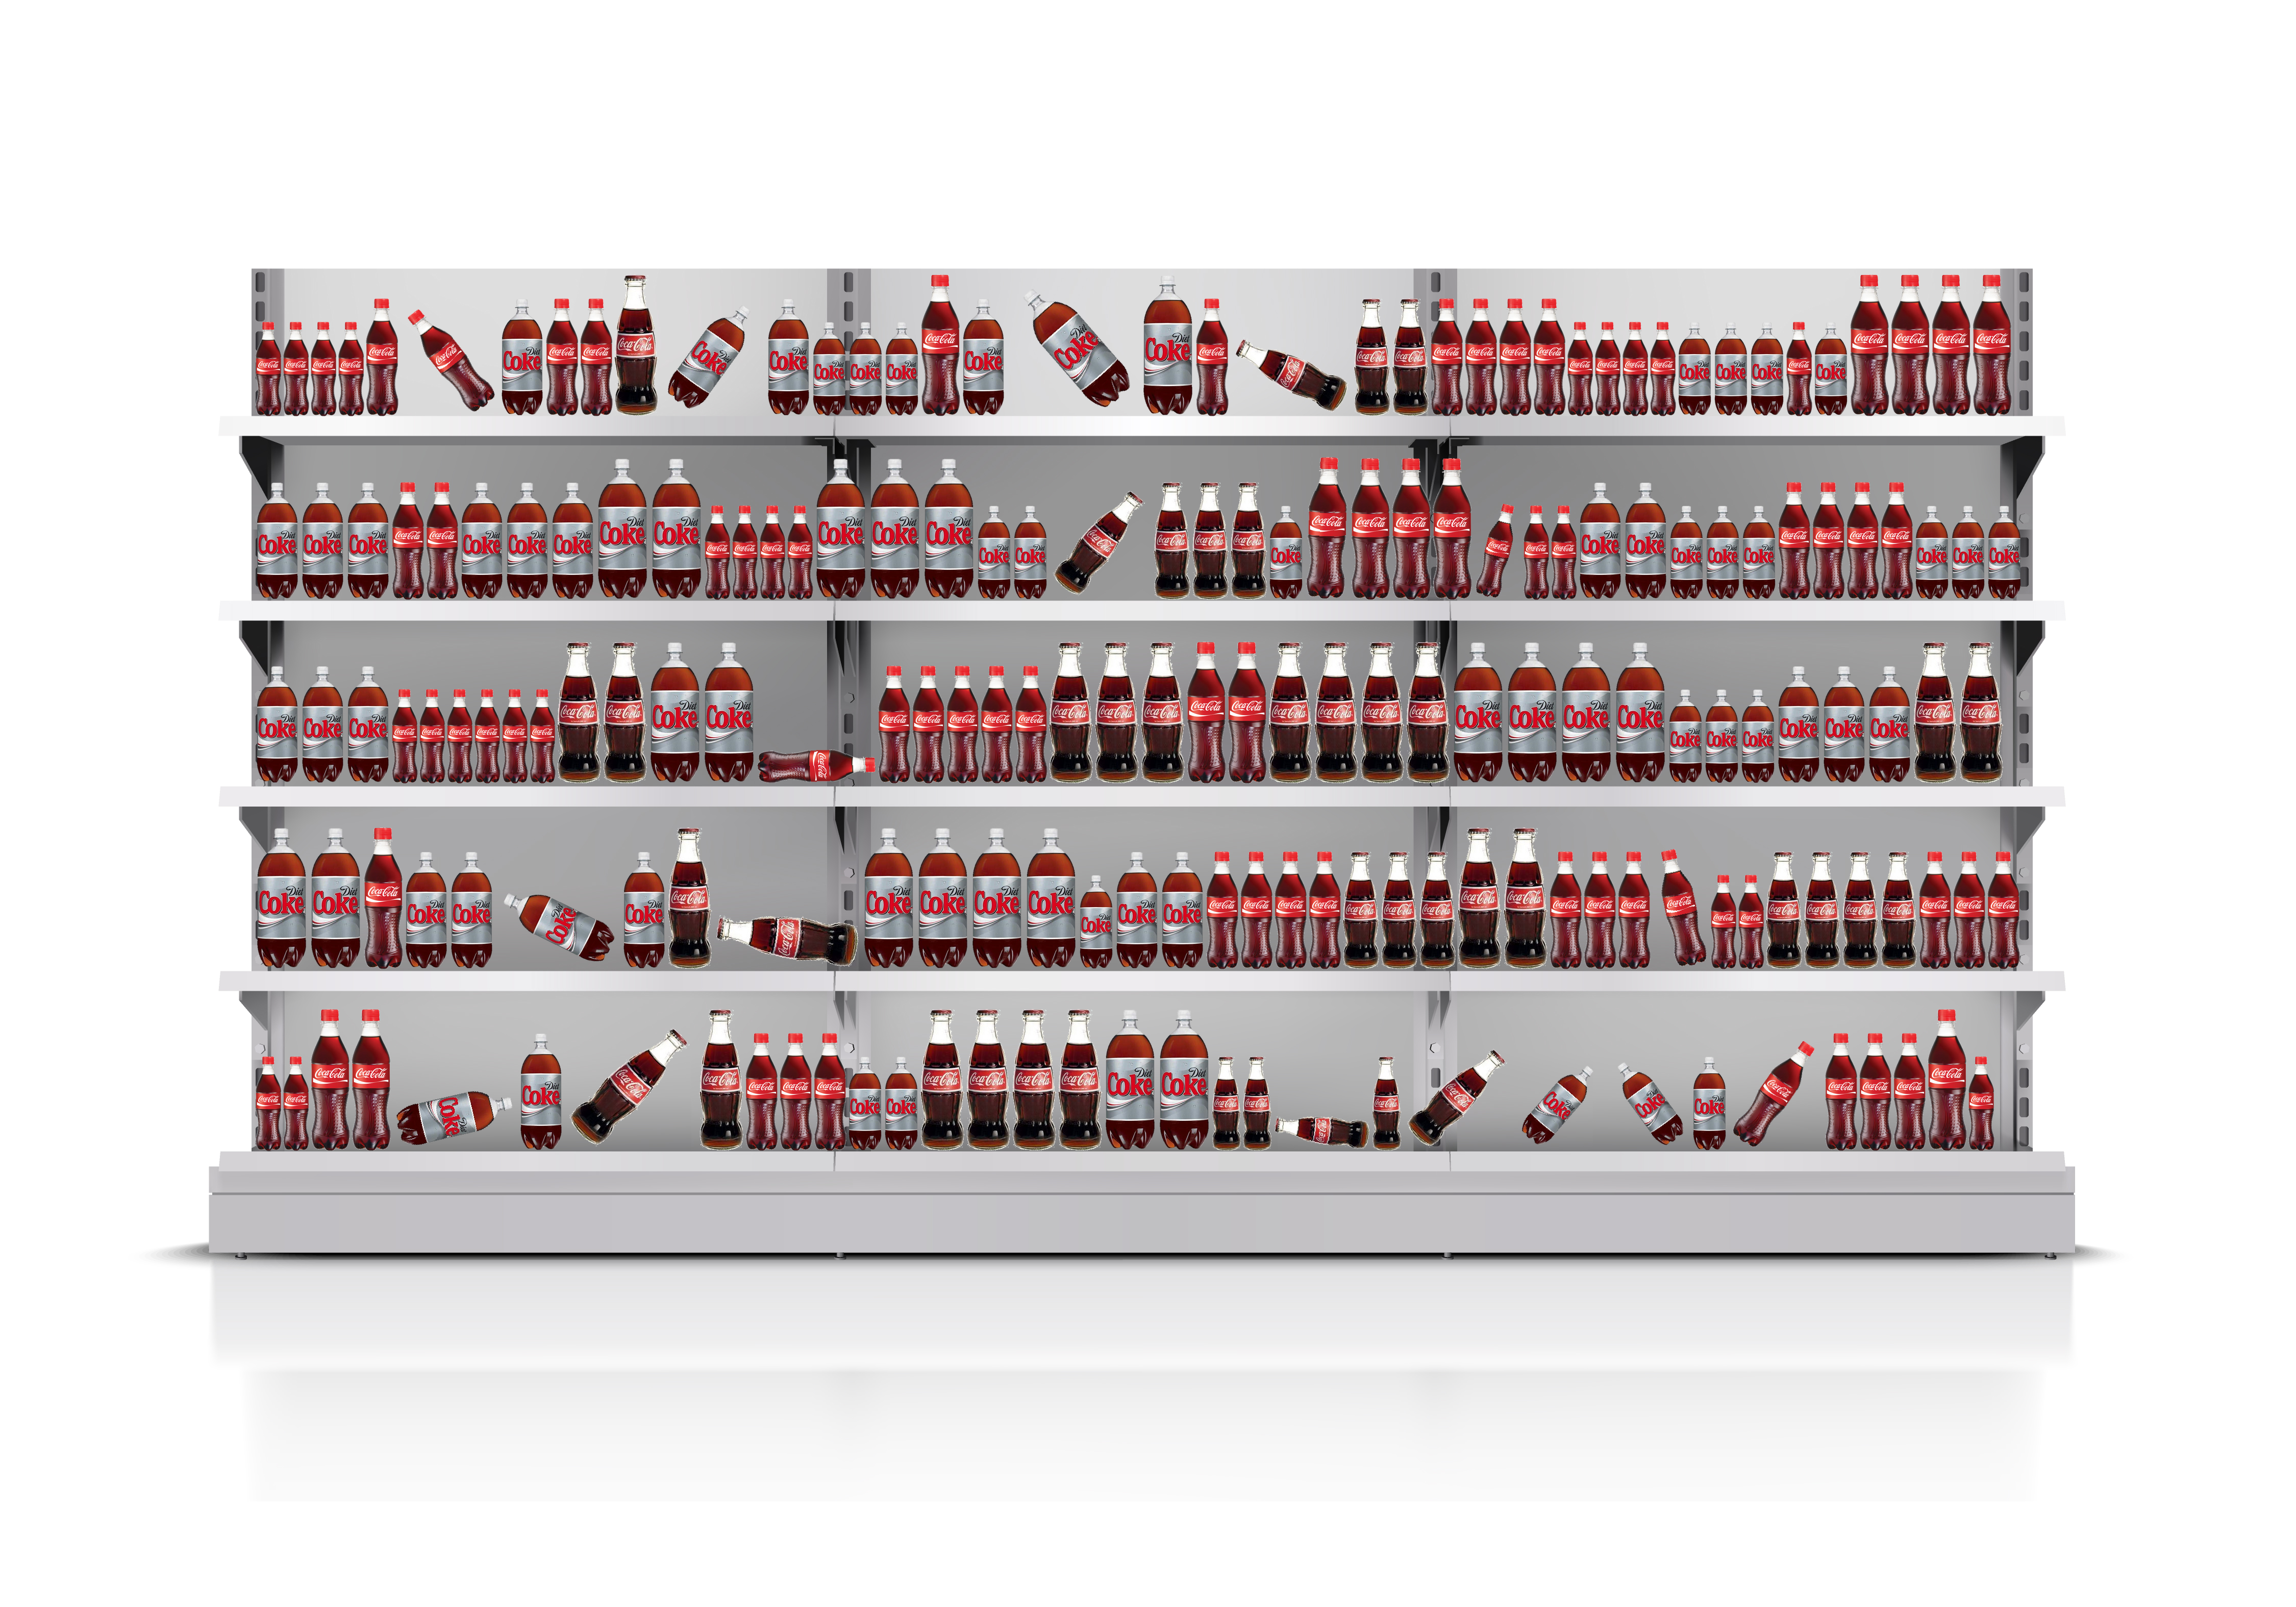

In [12]:
composite_background

In [3]:
#starting paste position
shelf_pos = {
    1:816,
    2:1176,
    3:1536,
    4:1900,
    5:2256
}
x_start, x_end = 500, 3900
shelf_ht = 40
x_offset = 2

In [4]:

composite = background.copy()
for shelf in shelf_pos.keys():
    paste_pos = (x_start, shelf_pos[shelf]-img_size[1])
    while paste_pos[0] < x_end:
        new_foreground = Image.new('RGBA', background.size, color = (0, 0, 0, 0))
        new_foreground.paste(foreground, paste_pos)
        new_alpha_mask = Image.new('L', background.size, color=0)
        new_alpha_mask.paste(alpha_mask, paste_pos)
        composite = Image.composite(new_foreground, composite, new_alpha_mask)
        paste_pos = (paste_pos[0]+img_size[0]+x_offset, paste_pos[1])

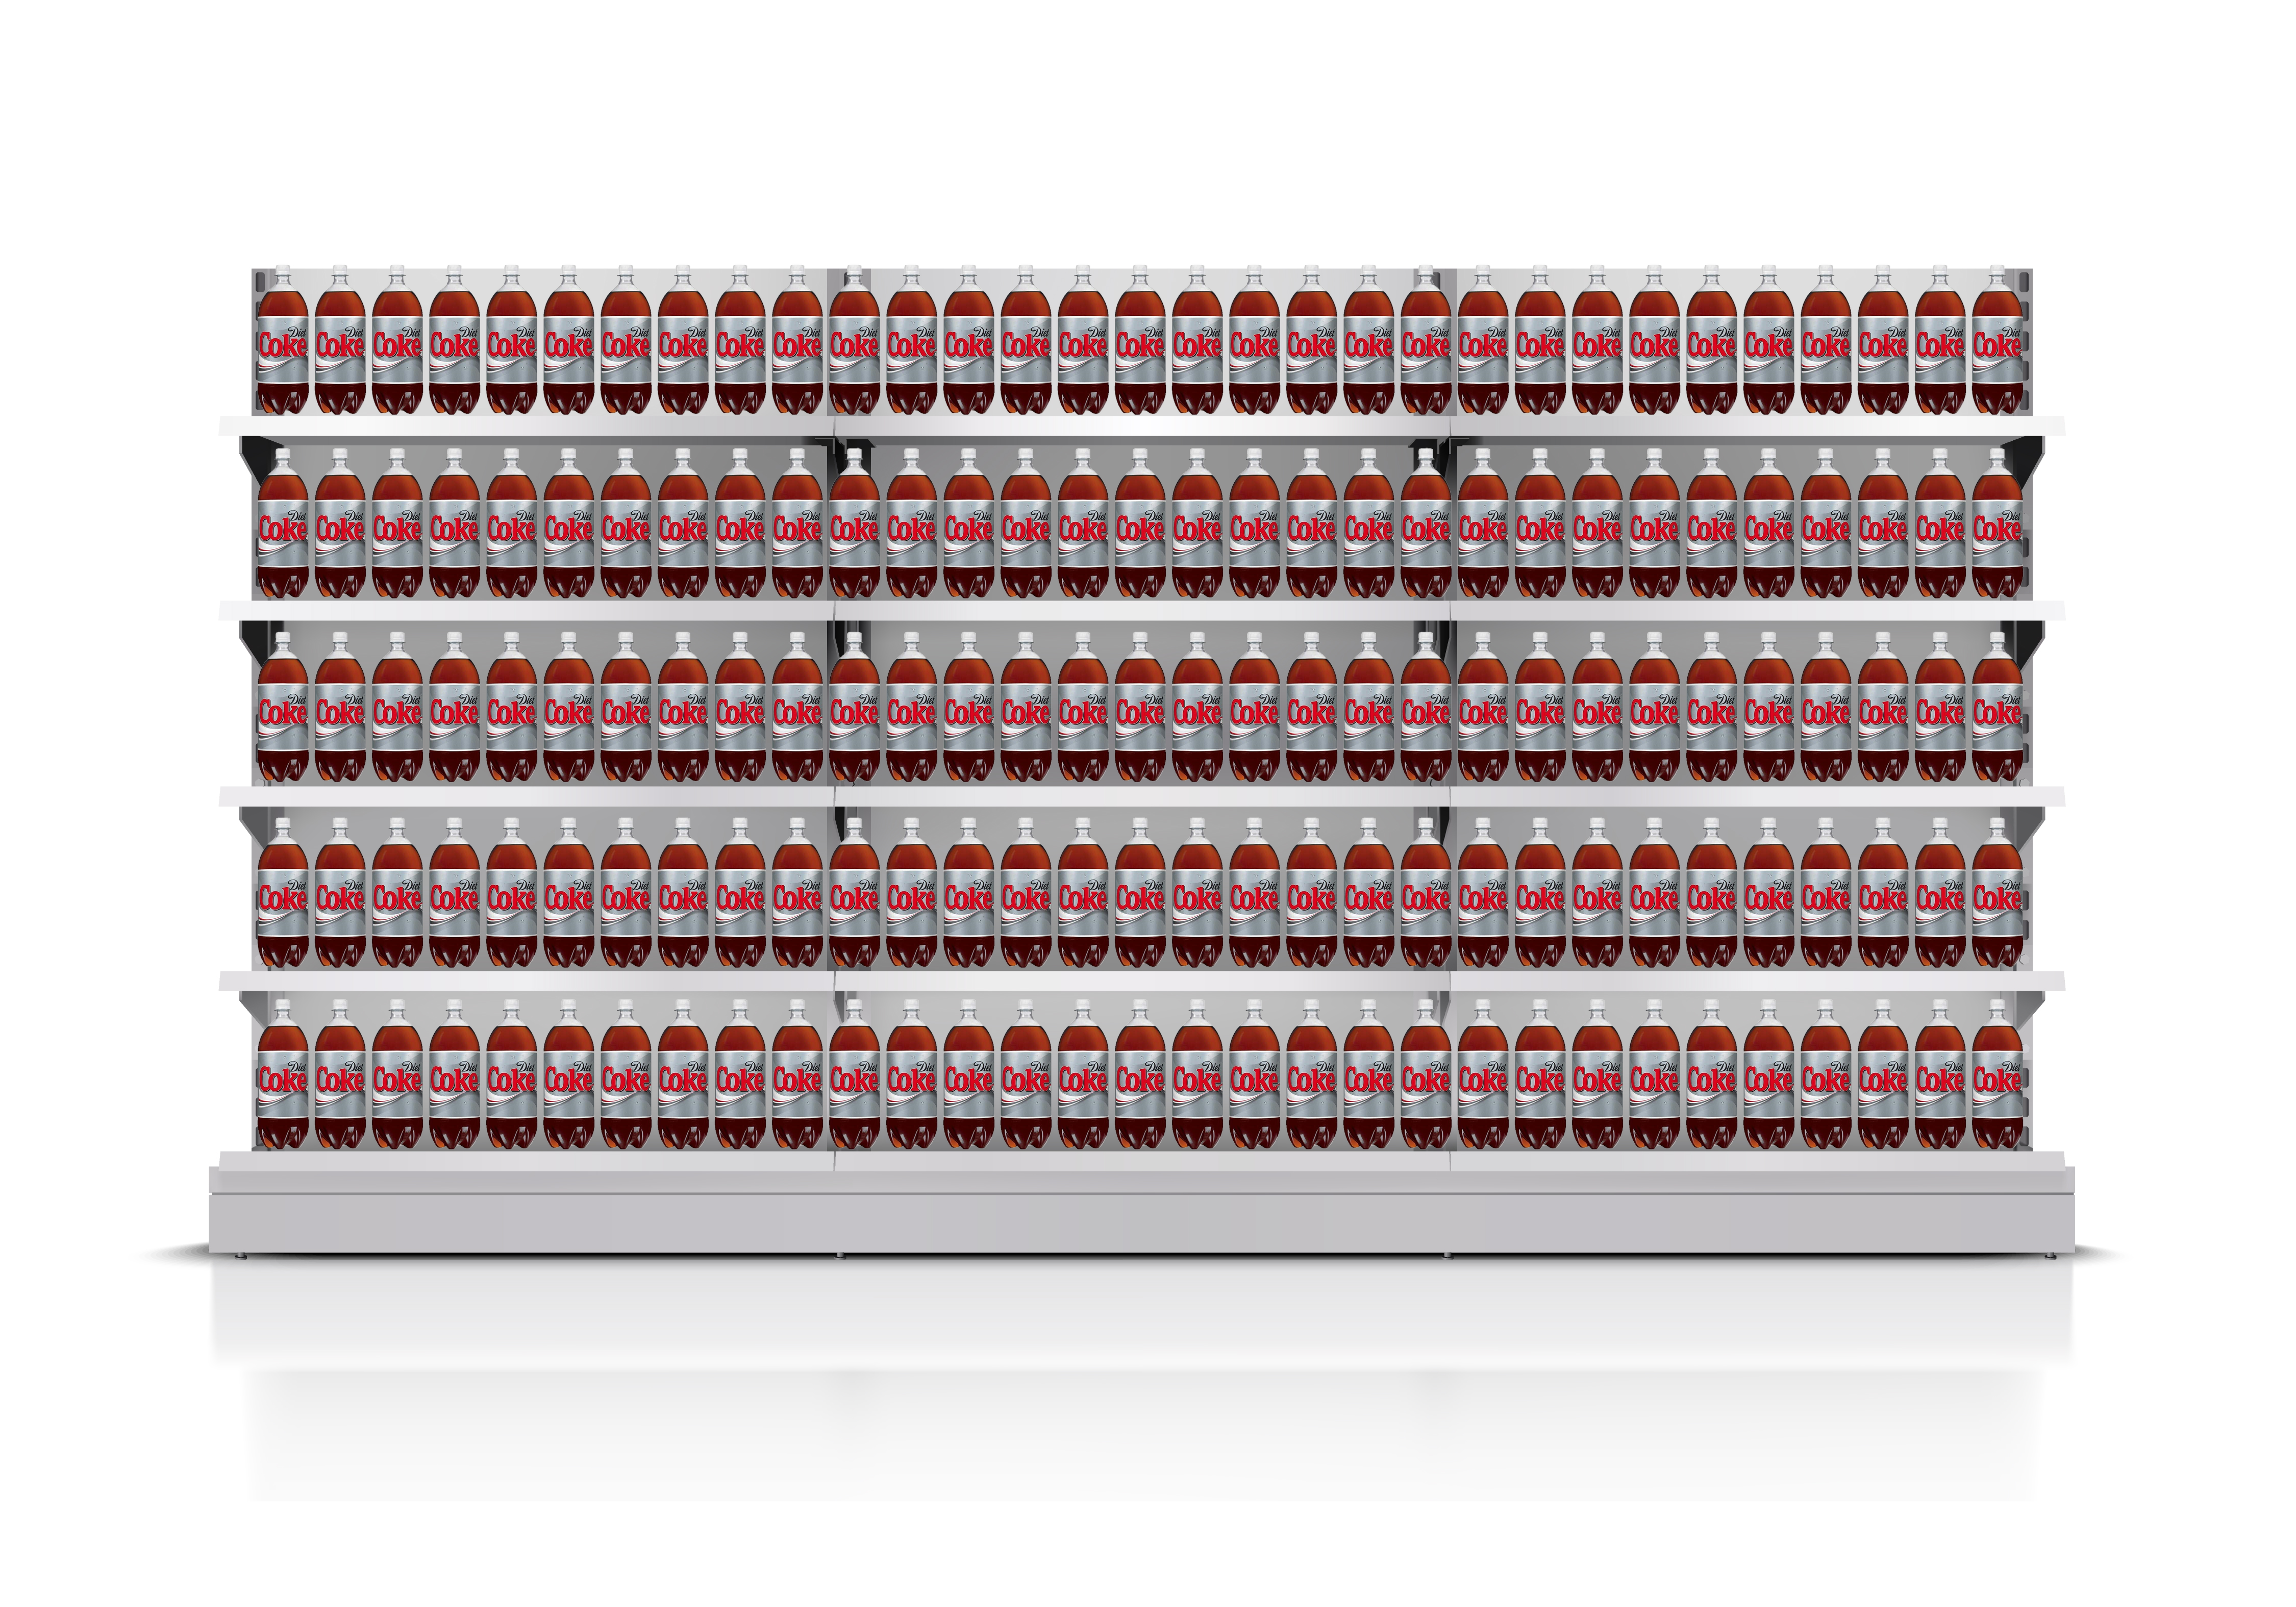

In [5]:
composite

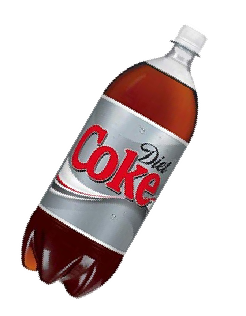

In [25]:
 foreground.rotate(-30, expand=1)

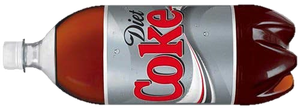

In [23]:
foreground.rotate(90, expand=1)

In [ ]:

def add_background_img(name, shelf_region, shelf_y_coordinates, shelf_height):
    if  os.path.exists(config_path):
        with open(config_path, "r") as conf_file:
            config = json.load(conf_file)
        if target in config:
            
        else:
            
        
    else:
        config = {}

    
   
        
    
    
    
    

In [18]:
config_path = "config/backgrounds.json"
with open(config_path, "r") as conf_file:
    config = json.load(conf_file)

In [19]:
config

{'background_1': {'num_shelves': 2,
  'shelf_region': [[100, 100], [500, 500]],
  'shelf_width': 100,
  'shelf_y_positions': [220, 350]}}

In [17]:
label = "background_1"
config[label] = {}
config[label]["shelf_region"] = ((100,100),(500,500))
config[label]["shelf_width"] = 100
config[label]["num_shelves"] = 2
config[label]["shelf_y_positions"] = (220,350)
with open(config_path, "w") as conf_file:
    json.dump(config, conf_file, indent=4)

In [21]:
("asd"
"asfd"
"{}").format("asasd")

'asdasfdasasd'

In [6]:
from src.template_manager.template_manager import TemplateManager

In [8]:
shelf_pos = {
    1:816,
    2:1176,
    3:1536,
    4:1900,
    5:2256
}

mgr = TemplateManager()
background_args = {
    "shelf_region" : ((500,500),(3900, 2556)),
    "shelf_ht" : 310,
    "num_shelves" : 5,
    "shelf_y_positions":(816,1176,1536,1990,2256)
}
foreground_args={
    "category":"bottles",
    "height":272,
    "width":86
}
mgr.add_template(label="bottle_3",template_type="foreground",**foreground_args)

New foreground object bottle_3 configured.


In [2]:
mgr = TemplateManager()


Removed category bottle and all associated objects.


In [15]:
mgr.add_foreground_category(category="bottle")

New foreground category bottle added.


In [18]:
background_args = {
    "label":"large_shelf_stock_2",
    "template_type":"background",
    "shelf_region" : ((500,500),(3900, 2556)),
    "shelf_ht" : 310,
    "num_shelves" : 5,
    "shelf_y_positions":(816,1176,1536,1990,2256)
}
foreground_args={
    "label":"bottle_1",
    "template_type":"foreground",
    "category":"bottle",
    "height":300,
    "width":188
}
mgr.add_template(**foreground_args)

New foreground object bottle_1 configured.


In [13]:
mgr.del_foreground_category(category="bottle")

Removed category bottle and all associated objects.


In [17]:
foreground_args={
    "label":"bottle",
    "template_type":"foreground",
    "category":"bottle",
}
mgr.del_template(**foreground_args)

foreground object bottle removed.
